# Glass Identification

1. Project description

The project is about identifying the type of glass based on its chemical properties using machine learning classification techniques.The dataset contains 214 observations and 11 variables.

The goal of this project is to classify samples of glass into one of six classes based on their chemical properties.

The independent variables are the first 10 variables in the list, which are the chemical properties of the glass. The target variable is the type of glass, which we want to predict based on the independent variables.

1.1 # Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

1.2 # Importing dataset

In [2]:
df = pd.read_csv("glass.csv")
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Types of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1


In [3]:
df.set_index('Id number', inplace=True)
print(df)

                RI     Na    Mg    Al     Si     K     Ca    Ba    Fe  \
Id number                                                               
1          1.52101  13.64  4.49  1.10  71.78  0.06   8.75  0.00  0.00   
2          1.51761  13.89  3.60  1.36  72.73  0.48   7.83  0.00  0.00   
3          1.51618  13.53  3.55  1.54  72.99  0.39   7.78  0.00  0.00   
4          1.51766  13.21  3.69  1.29  72.61  0.57   8.22  0.00  0.00   
5          1.51742  13.27  3.62  1.24  73.08  0.55   8.07  0.00  0.00   
6          1.51596  12.79  3.61  1.62  72.97  0.64   8.07  0.00  0.26   
7          1.51743  13.30  3.60  1.14  73.09  0.58   8.17  0.00  0.00   
8          1.51756  13.15  3.61  1.05  73.24  0.57   8.24  0.00  0.00   
9          1.51918  14.04  3.58  1.37  72.08  0.56   8.30  0.00  0.00   
10         1.51755  13.00  3.60  1.36  72.99  0.57   8.40  0.00  0.11   
11         1.51571  12.72  3.46  1.56  73.20  0.67   8.09  0.00  0.24   
12         1.51763  12.80  3.66  1.27  73.01  0.60 

In [4]:
df.head(20)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Types of glass
Id number,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1


In [5]:
df.tail(20)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Types of glass
Id number,,,,,,,,,,
195,1.51683,14.56,0.0,1.98,73.29,0.00,8.52,1.57,0.07,7
196,1.51545,14.14,0.0,2.68,73.39,0.08,9.07,0.61,0.05,7
197,1.51556,13.87,0.0,2.54,73.23,0.14,9.41,0.81,0.01,7
198,1.51727,14.70,0.0,2.34,73.28,0.00,8.95,0.66,0.00,7
199,1.51531,14.38,0.0,2.66,73.10,0.04,9.08,0.64,0.00,7
200,1.51609,15.01,0.0,2.51,73.05,0.05,8.83,0.53,0.00,7
201,1.51508,15.15,0.0,2.25,73.50,0.00,8.34,0.63,0.00,7
202,1.51653,11.95,0.0,1.19,75.18,2.70,8.93,0.00,0.00,7
203,1.51514,14.85,0.0,2.42,73.72,0.00,8.39,0.56,0.00,7


1.3 # EDA (Exploratory Data Analysis)

In [6]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Types of glass'], dtype='object')

In [7]:
df.dtypes

RI                float64
Na                float64
Mg                float64
Al                float64
Si                float64
K                 float64
Ca                float64
Ba                float64
Fe                float64
Types of glass      int64
dtype: object

In [8]:
df.shape

(214, 10)

We can see here that there is 214 rows and 10 columns in which 9 are independent variable and 1 is target variable

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RI              214 non-null    float64
 1   Na              214 non-null    float64
 2   Mg              214 non-null    float64
 3   Al              214 non-null    float64
 4   Si              214 non-null    float64
 5   K               214 non-null    float64
 6   Ca              214 non-null    float64
 7   Ba              214 non-null    float64
 8   Fe              214 non-null    float64
 9   Types of glass  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


In [10]:
df.isnull().sum()

RI                0
Na                0
Mg                0
Al                0
Si                0
K                 0
Ca                0
Ba                0
Fe                0
Types of glass    0
dtype: int64

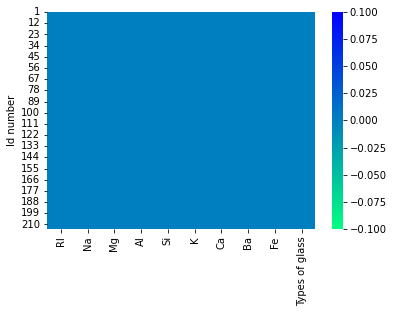

In [11]:
# Lets visualize the heat map to check the null values

sns.heatmap(df.isnull(), cmap='winter_r')
plt.show()

As we can see there is no null values

In [12]:
# Check the value count of columns

for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print('\n')

RI
1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
1.51674    2
1.51768    2
1.51655    2
1.51811    2
1.52213    2
1.51779    2
1.51610    2
1.51646    2
1.51640    2
1.51623    2
1.51613    2
1.51769    2
1.51969    2
1.51905    2
1.52172    2
1.51514    2
1.51793    2
1.51593    2
1.51711    2
1.51618    2
1.51761    2
1.51763    2
1.52177    2
1.51596    2
1.51743    2
1.51784    2
1.51829    2
1.51755    2
1.51667    1
1.51694    1
1.52121    1
1.51872    1
1.51776    1
1.51665    1
1.51796    1
1.51707    1
1.52127    1
1.51643    1
1.51806    1
1.52081    1
1.52068    1
1.51670    1
1.51839    1
1.52020    1
1.52614    1
1.51660    1
1.51709    1
1.51813    1
1.51800    1
1.51832    1
1.51851    1
1.51690    1
1.51789    1
1.51662    1
1.52101    1
1.51934    1
1.51531    1
1.52247    1
1.52365    1
1.51602    1
1.51719    1
1.51683    1
1.51545    1
1.51556    1
1.51727    1
1.51609    1
1.52211    1
1.51508    1
1.51653    1
1.51658    1
1.51617    1
1.51732  

In [13]:
# Check the unique value

for col in df.columns:
    print(col, df[col].unique())

RI [1.52101 1.51761 1.51618 1.51766 1.51742 1.51596 1.51743 1.51756 1.51918
 1.51755 1.51571 1.51763 1.51589 1.51748 1.51784 1.52196 1.51911 1.51735
 1.5175  1.51966 1.51736 1.51751 1.5172  1.51764 1.51793 1.51721 1.51768
 1.51747 1.51775 1.51753 1.51783 1.51567 1.51909 1.51797 1.52213 1.51779
 1.5221  1.51786 1.519   1.51869 1.52667 1.52223 1.51898 1.5232  1.51926
 1.51808 1.51837 1.51778 1.51769 1.51215 1.51824 1.51754 1.51905 1.51977
 1.52172 1.52227 1.52099 1.52152 1.523   1.51574 1.51848 1.51593 1.51631
 1.5159  1.51645 1.51627 1.51613 1.51592 1.51646 1.51594 1.51409 1.51625
 1.51569 1.5164  1.51841 1.51605 1.51588 1.51629 1.5186  1.51689 1.51811
 1.51655 1.5173  1.5182  1.52725 1.5241  1.52475 1.53125 1.53393 1.52222
 1.51818 1.52664 1.52739 1.52777 1.51892 1.51847 1.51846 1.51829 1.51708
 1.51673 1.51652 1.51844 1.51663 1.51687 1.51707 1.52177 1.51872 1.51667
 1.52081 1.52068 1.5202  1.52614 1.51813 1.518   1.51789 1.51806 1.51711
 1.51674 1.5169  1.51851 1.51662 1.51709 1.5166 

# Description Of Data

In [14]:
# Statistical summary of numerical columns

df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Types of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


This is the statistical summary of the columns in the glass dataset:

1."count" represents the number of non-missing values for each column.

2."mean" represents the average value of each column.

3."std" represents the standard deviation of each column.

4."min" represents the minimum value of each column.

5."25%" represents the first quartile (Q1) of each column, i.e., the value below which 25% of the data falls.

6."50%" represents the second quartile (Q2) of each column, i.e., the median, or the value below which 50% of the data falls.

7."75%" represents the third quartile (Q3) of each column, i.e., the value below which 75% of the data falls.

8."max" represents the maximum value of each column.

# Data visualization - Graphical Analysis

Univariate Analysis

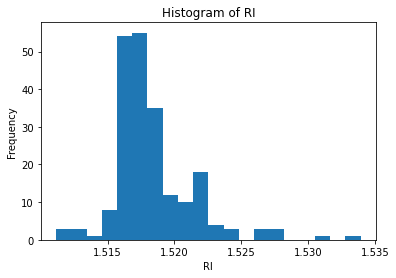

In [15]:
# Lets analyze the RI column by histogram plot

plt.hist(df['RI'], bins=20)
plt.xlabel('RI')
plt.ylabel('Frequency')
plt.title('Histogram of RI')
plt.show()

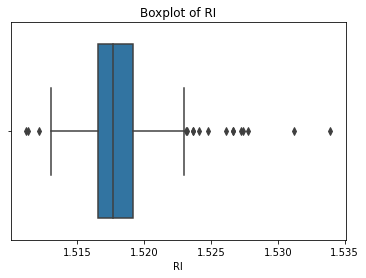

In [16]:
# Lets analyze the RI column by box plot

sns.boxplot(x=df['RI'])
plt.xlabel('RI')
plt.title('Boxplot of RI')
plt.show()

Here in both the plots we can see data is positively skewed and can see outliers present in the data

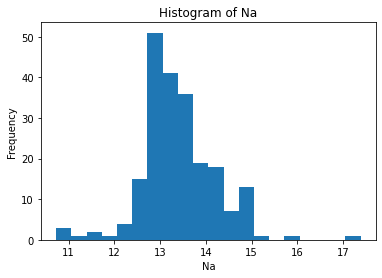

In [17]:
# Lets analyze the Na column by histogram plot

plt.hist(df['Na'], bins=20)
plt.xlabel('Na')
plt.ylabel('Frequency')
plt.title('Histogram of Na')
plt.show()

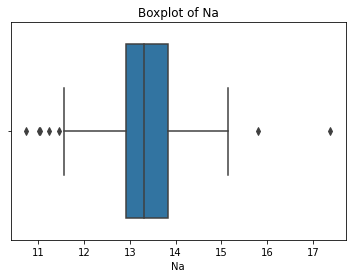

In [18]:
# Lets analyze the Na column by box plot

sns.boxplot(x=df['Na'])
plt.xlabel('Na')
plt.title('Boxplot of Na')
plt.show()

Here in both the plots of Na column we can see distribution is almost evenly and few outliers are present

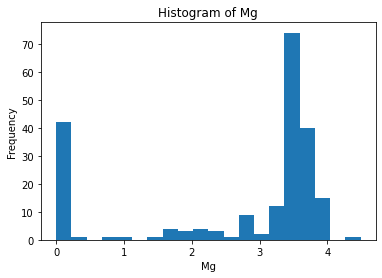

In [19]:
# Lets analyze the Mg column by histogram plot

plt.hist(df['Mg'], bins=20)
plt.xlabel('Mg')
plt.ylabel('Frequency')
plt.title('Histogram of Mg')
plt.show()

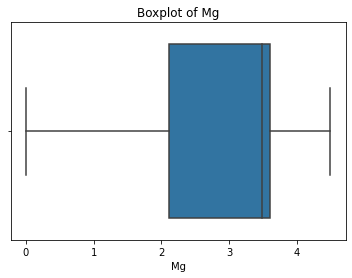

In [20]:
# Lets analyze the Mg column by box plot

sns.boxplot(x=df['Mg'])
plt.xlabel('Mg')
plt.title('Boxplot of Mg')
plt.show()

Here in these plots of Mg we can see few data is negatively skewed and few is scatered but boxplot we can see no outliers.

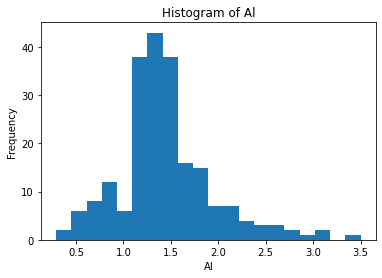

In [21]:
# Lets analyze the Al column by histogram plot

plt.hist(df['Al'], bins=20)
plt.xlabel('Al')
plt.ylabel('Frequency')
plt.title('Histogram of Al')
plt.show()

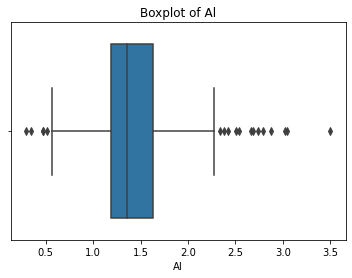

In [22]:
# Lets analyze the Al column by box plot

sns.boxplot(x=df['Al'])
plt.xlabel('Al')
plt.title('Boxplot of Al')
plt.show()

Here we can see in the plots of Al that data distribution is slightly positively skewed and outliers are present

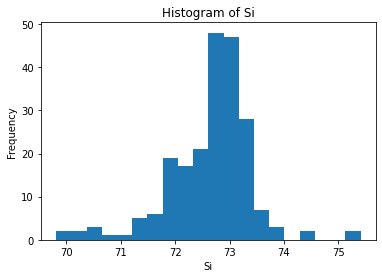

In [23]:
# Lets analyze the Si column by histogram plot

plt.hist(df['Si'], bins=20)
plt.xlabel('Si')
plt.ylabel('Frequency')
plt.title('Histogram of Si')
plt.show()

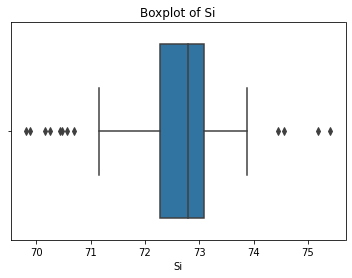

In [24]:
# Lets analyze the Si column by box plot

sns.boxplot(x=df['Si'])
plt.xlabel('Si')
plt.title('Boxplot of Si')
plt.show()

Here in the plots of Si we can see data is evenly distributed and the outliers are present 

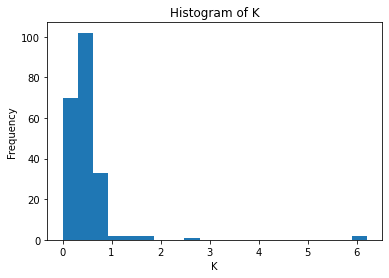

In [25]:
# Lets analyze the K column by histogram plot

plt.hist(df['K'], bins=20)
plt.xlabel('K')
plt.ylabel('Frequency')
plt.title('Histogram of K')
plt.show()

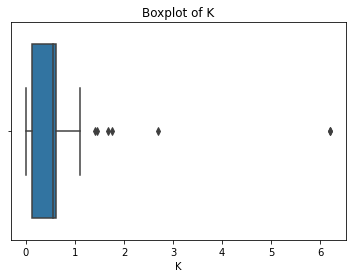

In [26]:
# Lets analyze the K column by box plot

sns.boxplot(x=df['K'])
plt.xlabel('K')
plt.title('Boxplot of K')
plt.show()

Here in the plots of K we can see data distribution is positively skewed and few outliers are present

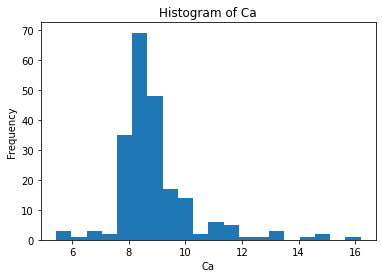

In [27]:
# Lets analyze the Ca column by histogram plot

plt.hist(df['Ca'], bins=20)
plt.xlabel('Ca')
plt.ylabel('Frequency')
plt.title('Histogram of Ca')
plt.show()

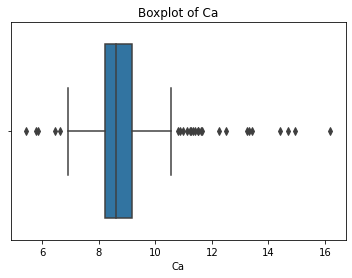

In [28]:
# Lets analyze the Ca column by box plot

sns.boxplot(x=df['Ca'])
plt.xlabel('Ca')
plt.title('Boxplot of Ca')
plt.show()

Here in the plots of Ca we can see that data is slightly positive skewed and outliers are present.

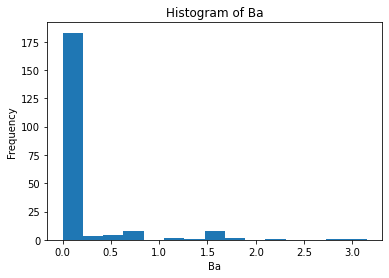

In [29]:
# Lets analyze the Ba column by histogram plot

plt.hist(df['Ba'], bins=15)
plt.xlabel('Ba')
plt.ylabel('Frequency')
plt.title('Histogram of Ba')
plt.show()

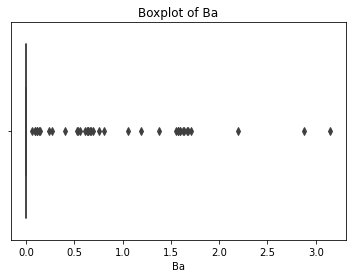

In [30]:
# Lets analyze the Ba column by box plot

sns.boxplot(x=df['Ba'])
plt.xlabel('Ba')
plt.title('Boxplot of Ba')
plt.show()

Here in the plots of Ba we can see that data is highly positively skewed and outliers are present

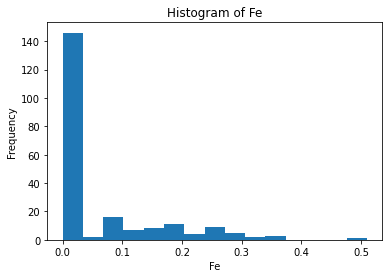

In [31]:
# Lets analyze the Fe column by histogram plot

plt.hist(df['Fe'], bins=15)
plt.xlabel('Fe')
plt.ylabel('Frequency')
plt.title('Histogram of Fe')
plt.show()

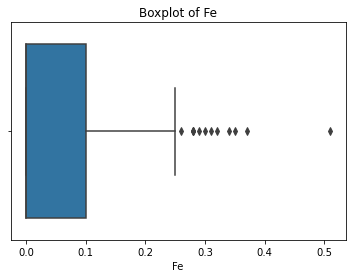

In [32]:
# Lets analyze the Fe column by box plot

sns.boxplot(x=df['Fe'])
plt.xlabel('Fe')
plt.title('Boxplot of Fe')
plt.show()

Here in the plots we can see data is positively skewed and outliers are present

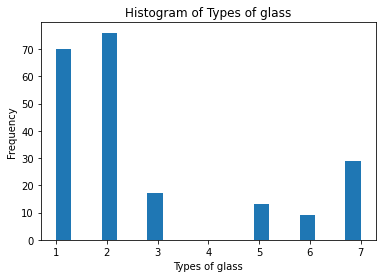

In [33]:
# Lets analyze the Types of glass column by histogram plot

plt.hist(df['Types of glass'], bins=20)
plt.xlabel('Types of glass')
plt.ylabel('Frequency')
plt.title('Histogram of Types of glass')
plt.show()

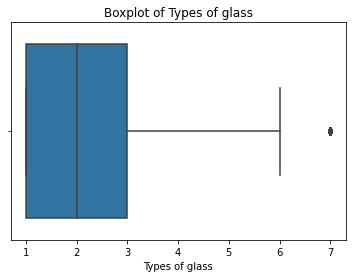

In [34]:
# Lets analyze the Types of glass column by box plot

sns.boxplot(x=df['Types of glass'])
plt.xlabel('Types of glass')
plt.title('Boxplot of Types of glass')
plt.show()

Here in the plots we can see that data is evenly distributed and few outliers are present

Bivariate Analysis

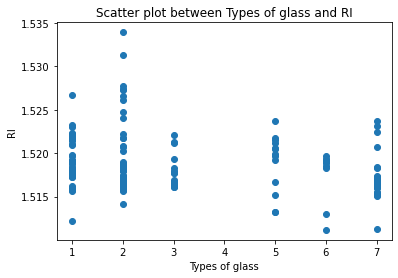

In [35]:
# Analyze the relation between Types of glass vs RI

plt.scatter(df['Types of glass'], df['RI'])
plt.xlabel('Types of glass')
plt.ylabel('RI')
plt.title('Scatter plot between Types of glass and RI')
plt.show()

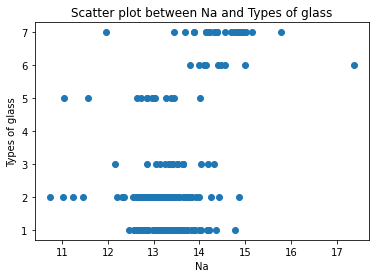

In [36]:
# Analyze the relation between Na vs Types of glass 

plt.scatter(df['Na'], df['Types of glass'])
plt.xlabel('Na')
plt.ylabel('Types of glass')
plt.title('Scatter plot between Na and Types of glass')
plt.show()

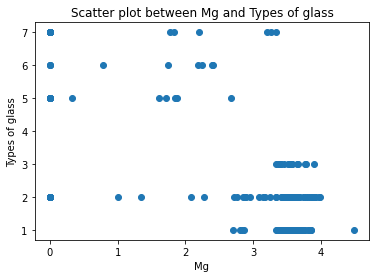

In [37]:
# Analyze the relation between Mg vs Types of glass 

plt.scatter(df['Mg'], df['Types of glass'])
plt.xlabel('Mg')
plt.ylabel('Types of glass')
plt.title('Scatter plot between Mg and Types of glass')
plt.show()

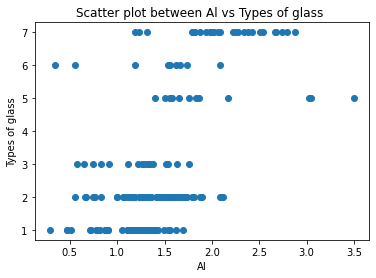

In [38]:
# Analyze the relation between Al vs Types of glass 

plt.scatter(df['Al'], df['Types of glass'])
plt.xlabel('Al')
plt.ylabel('Types of glass')
plt.title('Scatter plot between Al vs Types of glass ')
plt.show()

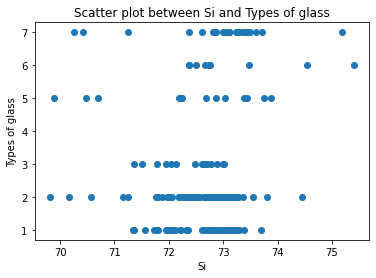

In [39]:
# Analyze the relation between Si vs Types of glass 

plt.scatter(df['Si'], df['Types of glass'])
plt.xlabel('Si')
plt.ylabel('Types of glass')
plt.title('Scatter plot between Si and Types of glass')
plt.show()

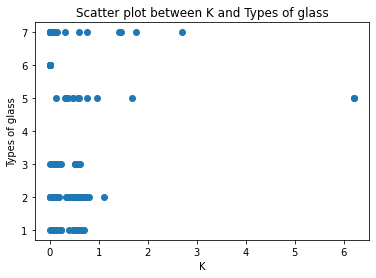

In [40]:
# Analyze the relation between K vs Types of glass 

plt.scatter(df['K'], df['Types of glass'])
plt.xlabel('K')
plt.ylabel('Types of glass')
plt.title('Scatter plot between K and Types of glass')
plt.show()

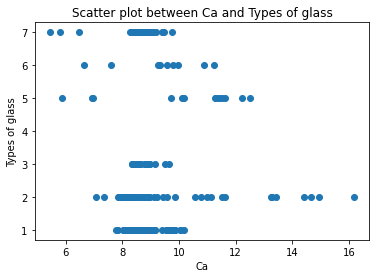

In [41]:
# Analyze the relation between Ca vs Types of glass 

plt.scatter(df['Ca'], df['Types of glass'])
plt.xlabel('Ca')
plt.ylabel('Types of glass')
plt.title('Scatter plot between Ca and Types of glass')
plt.show()

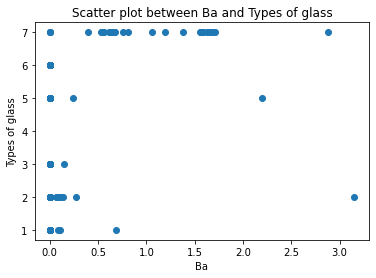

In [42]:
# Analyze the relation between Ba vs Types of glass 

plt.scatter(df['Ba'], df['Types of glass'])
plt.xlabel('Ba')
plt.ylabel('Types of glass')
plt.title('Scatter plot between Ba and Types of glass')
plt.show()

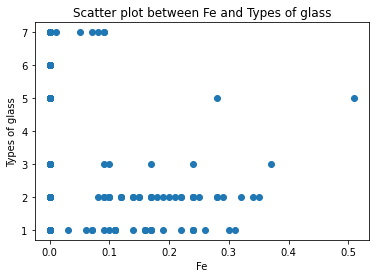

In [43]:
# Analyze the relation between Fe vs Types of glass 

plt.scatter(df['Fe'], df['Types of glass'])
plt.xlabel('Fe')
plt.ylabel('Types of glass')
plt.title('Scatter plot between Fe and Types of glass')
plt.show()

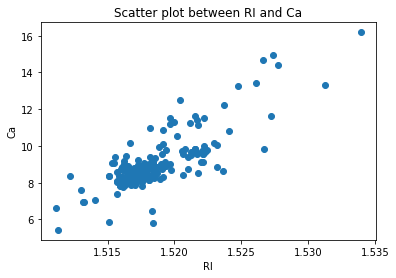

In [44]:
# Analyze the relation between RI vs Ca

plt.scatter(df['RI'], df['Ca'])
plt.xlabel('RI')
plt.ylabel('Ca')
plt.title('Scatter plot between RI and Ca')
plt.show()

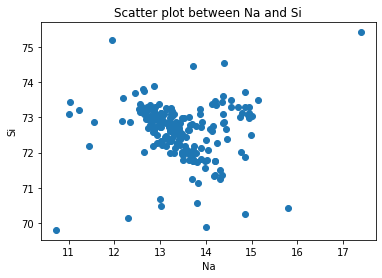

In [45]:
# Analyze the relation between Na vs Si

plt.scatter(df['Na'], df['Si'])
plt.xlabel('Na')
plt.ylabel('Si')
plt.title('Scatter plot between Na and Si')
plt.show()

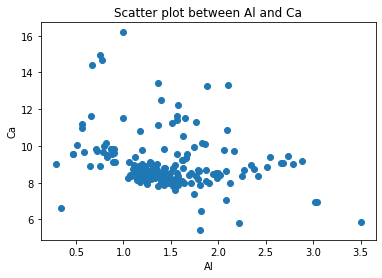

In [46]:
# Analyze the relation between Al vs Ca

plt.scatter(df['Al'], df['Ca'])
plt.xlabel('Al')
plt.ylabel('Ca')
plt.title('Scatter plot between Al and Ca')
plt.show()

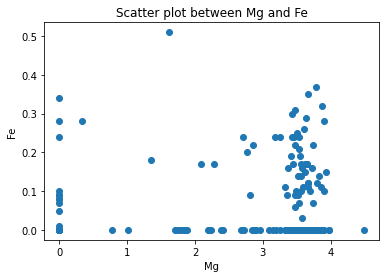

In [47]:
# Analyze the relation between Mg vs Fe

plt.scatter(df['Mg'], df['Fe'])
plt.xlabel('Mg')
plt.ylabel('Fe')
plt.title('Scatter plot between Mg and Fe')
plt.show()

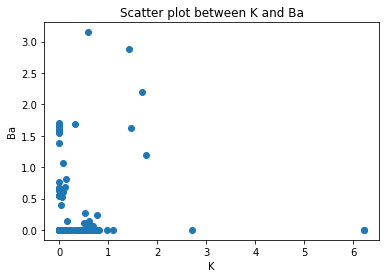

In [48]:
# Analyze the relation between K vs Ba

plt.scatter(df['K'], df['Ba'])
plt.xlabel('K')
plt.ylabel('Ba')
plt.title('Scatter plot between K and Ba')
plt.show()

Here in bivariate analysis we use scatter plot to see relation between different columns and as we can observe that most of the columns have null relations and few have positive correlation

Multivariate Analysis

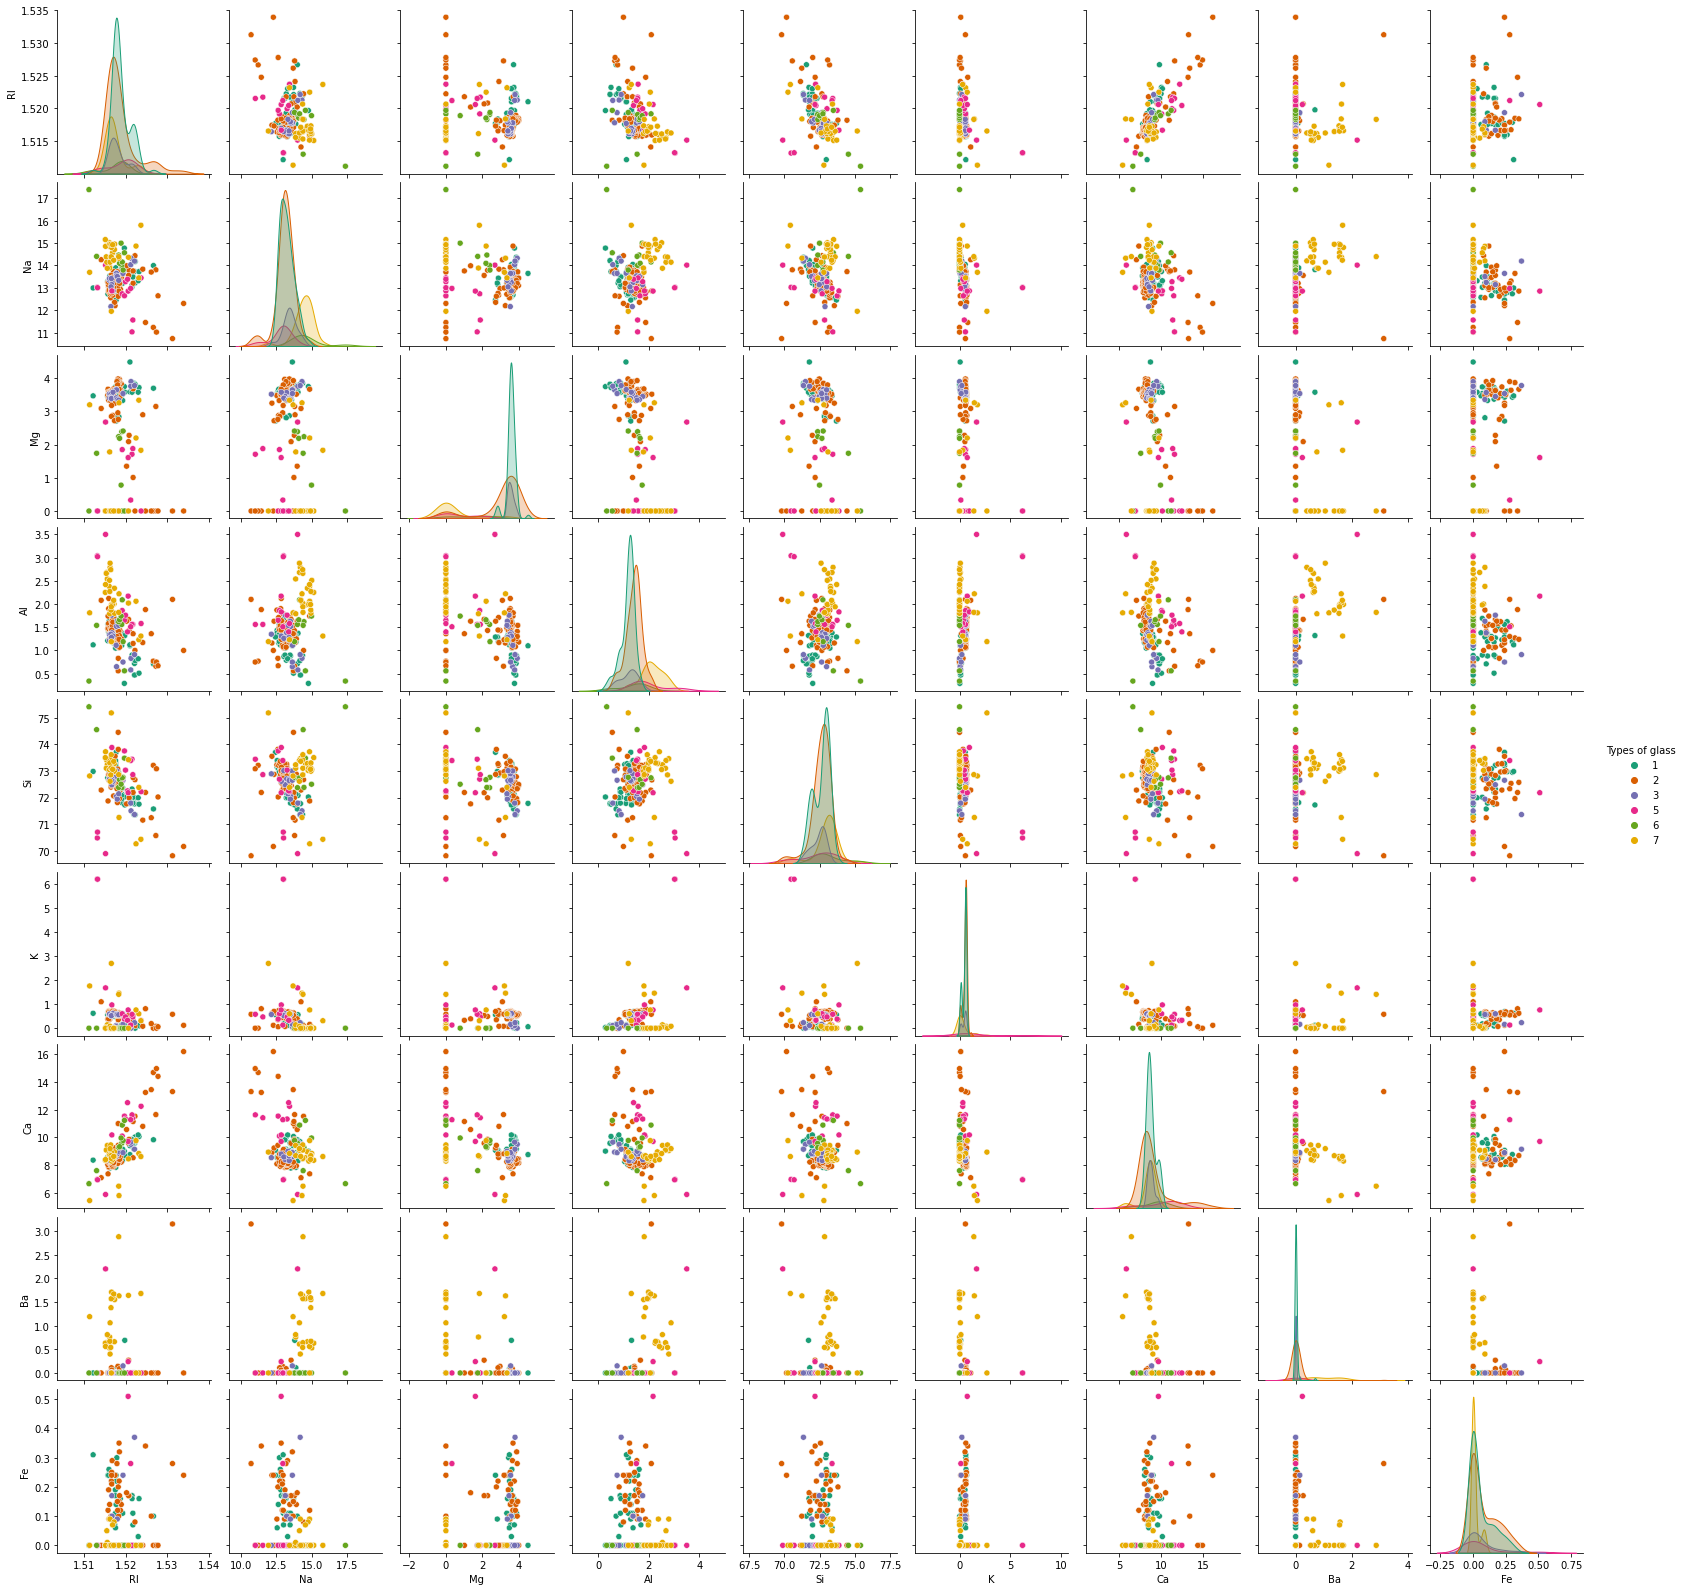

In [49]:
# select columns for pairplot
cols = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Types of glass']

# create pairplot
sns.pairplot(df[cols], hue='Types of glass', palette='Dark2')
plt.show()

# Outliers

In [50]:
df.shape

(214, 10)

In [51]:
df.dtypes

RI                float64
Na                float64
Mg                float64
Al                float64
Si                float64
K                 float64
Ca                float64
Ba                float64
Fe                float64
Types of glass      int64
dtype: object

In [52]:
# Set capping limits
lower_cap = df.quantile(0.05)
upper_cap = df.quantile(0.95)

# Cap the values
for col in df.columns:
    if col != 'Types':
        df[col] = np.where(df[col] < lower_cap[col], lower_cap[col], df[col])
        df[col] = np.where(df[col] > upper_cap[col], upper_cap[col], df[col])

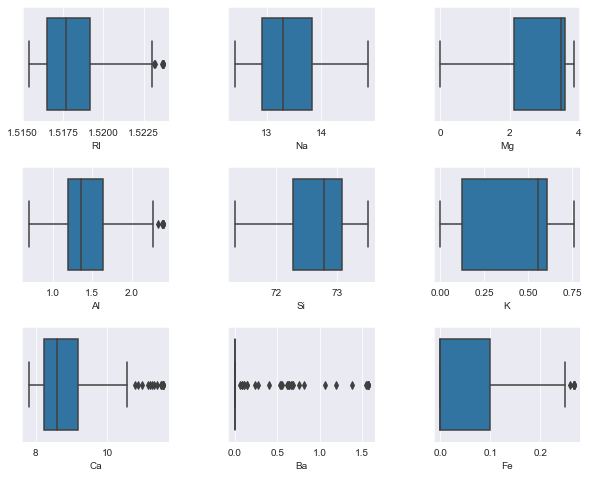

In [53]:
sns.set_style('darkgrid')

plt.figure(figsize=(10, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

cols = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

for i, col in enumerate(cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.xlabel(col)

plt.show()

In [54]:
# Remove outliers using the Z-score method
from scipy import stats
z = np.abs(stats.zscore(df))
df = df[(z < 3).all(axis=1)]

# check if outliers are removed
print("Original number of rows:", 214)
print("New number of rows:", df.shape[0])
print("Outliers removed:", 214  - df.shape[0])

Original number of rows: 214
New number of rows: 201
Outliers removed: 13


In [55]:
df.shape

(201, 10)

In [56]:
original_rows = 214
new_rows = df.shape[0]
outliers_removed = original_rows - new_rows
percent_loss = (outliers_removed / original_rows) * 100
print("Percentage loss:", percent_loss)

Percentage loss: 6.074766355140187


In [57]:
df.shape

(201, 10)

In [58]:
df.dtypes

RI                float64
Na                float64
Mg                float64
Al                float64
Si                float64
K                 float64
Ca                float64
Ba                float64
Fe                float64
Types of glass    float64
dtype: object

In [59]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Types of glass
Id number,,,,,,,,,,
1,1.521010,13.6400,3.85,1.100,71.7800,0.06,8.7500,0.00,0.000,1.0
2,1.517610,13.8900,3.60,1.360,72.7300,0.48,7.8300,0.00,0.000,1.0
3,1.516180,13.5300,3.55,1.540,72.9900,0.39,7.8125,0.00,0.000,1.0
4,1.517660,13.2100,3.69,1.290,72.6100,0.57,8.2200,0.00,0.000,1.0
5,1.517420,13.2700,3.62,1.240,73.0800,0.55,8.0700,0.00,0.000,1.0
6,1.515960,12.7900,3.61,1.620,72.9700,0.64,8.0700,0.00,0.260,1.0
7,1.517430,13.3000,3.60,1.140,73.0900,0.58,8.1700,0.00,0.000,1.0
8,1.517560,13.1500,3.61,1.050,73.2400,0.57,8.2400,0.00,0.000,1.0
9,1.519180,14.0400,3.58,1.370,72.0800,0.56,8.3000,0.00,0.000,1.0


# Skewness

In [60]:
# Lets check the skewenss

df.skew()

RI                0.934401
Na                0.733860
Mg               -1.409681
Al                0.594650
Si               -0.657479
K                -0.662374
Ca                1.376388
Ba                3.764672
Fe                1.309674
Types of glass    1.360047
dtype: float64

In [61]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Types of glass
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,1.518274,13.366557,2.813582,1.398090,72.661791,0.430299,8.936791,0.064826,0.055174,2.542289
std,0.002284,0.621878,1.348051,0.410945,0.570517,0.251014,1.002639,0.212657,0.088448,1.910354
min,1.515401,12.415000,0.000000,0.696000,71.315000,0.000000,7.812500,0.000000,0.000000,1.000000
25%,1.516460,12.880000,2.720000,1.180000,72.280000,0.150000,8.240000,0.000000,0.000000,1.000000
50%,1.517690,13.250000,3.490000,1.350000,72.770000,0.560000,8.650000,0.000000,0.000000,2.000000
75%,1.519160,13.720000,3.610000,1.570000,73.080000,0.610000,9.260000,0.000000,0.100000,3.000000
max,1.523664,14.853500,3.850000,2.394000,73.517500,0.760000,11.561500,1.380000,0.267000,7.000000


# Correlation Between Target and Independent Variable

In [62]:
# Lets check correlation
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Types of glass
RI,1.000000,0.047863,-0.091846,-0.512416,-0.591380,-0.376121,0.770369,-0.239520,0.076112,-0.145811
Na,0.047863,1.000000,-0.291275,0.183193,-0.281113,-0.643868,0.041849,0.436479,-0.222832,0.472770
Mg,-0.091846,-0.291275,1.000000,-0.453315,-0.174609,0.426899,-0.559541,-0.446181,0.096743,-0.723754
Al,-0.512416,0.183193,-0.453315,1.000000,0.227562,0.133599,-0.212929,0.515222,-0.088564,0.595874
Si,-0.591380,-0.281113,-0.174609,0.227562,1.000000,0.158911,-0.248616,0.177168,-0.043715,0.185809
K,-0.376121,-0.643868,0.426899,0.133599,0.158911,1.000000,-0.470085,-0.337692,0.133627,-0.373312
Ca,0.770369,0.041849,-0.559541,-0.212929,-0.248616,-0.470085,1.000000,-0.041887,0.036437,0.205045
Ba,-0.239520,0.436479,-0.446181,0.515222,0.177168,-0.337692,-0.041887,1.000000,-0.097410,0.594633
Fe,0.076112,-0.222832,0.096743,-0.088564,-0.043715,0.133627,0.036437,-0.097410,1.000000,-0.185213
Types of glass,-0.145811,0.472770,-0.723754,0.595874,0.185809,-0.373312,0.205045,0.594633,-0.185213,1.000000


# Visualization of Correlation Between Target And Independent Variable

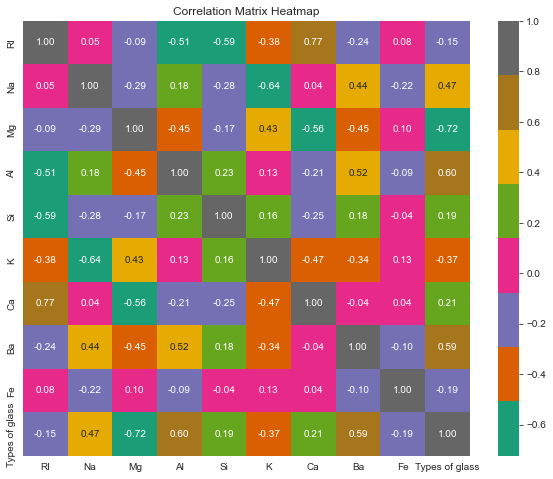

In [63]:
# create heatmap
plt.figure(figsize=(10, 8))

corr_matrix = df.corr()
# plot heatmap with formatted annotations
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap="Dark2")

plt.title("Correlation Matrix Heatmap")
plt.show()

# Target and Features Variable

In [64]:
# Define Target and Features variables

y = df['Types of glass']
X = df.drop('Types of glass', axis=1)

print("Target variable name: ", y.name)
print("Target variable dimensions: ", y.shape)

print("\nFeatures variables names: ", list(X.columns))
print("Features variables dimensions: ", X.shape)

Target variable name:  Types of glass
Target variable dimensions:  (201,)

Features variables names:  ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
Features variables dimensions:  (201, 9)


# Featuring Scaling

In [65]:
from sklearn.preprocessing import RobustScaler

# Select all numerical columns except the target variable
num_cols = [col for col in df.columns if col != 'Types of glass']

# Initialize the scaler
scaler = RobustScaler()

# Fit and transform the numerical data
scaled_df = scaler.fit_transform(df[num_cols])

# Create a new dataframe with the scaled data
scaled_df = pd.DataFrame(data=scaled_df, columns=num_cols)

# Add the unscaled target variable column back to the dataframe
scaled_df['Types of glass'] = df['Types of glass']
scaled_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Types of glass
0,1.229630,0.464286,0.404494,-0.641026,-1.237500,-1.086957,0.098039,0.00,0.00,NaN
1,-0.029630,0.761905,0.123596,0.025641,-0.050000,-0.173913,-0.803922,0.00,0.00,1.0
2,-0.559259,0.333333,0.067416,0.487179,0.275000,-0.369565,-0.821078,0.00,0.00,1.0
3,-0.011111,-0.047619,0.224719,-0.153846,-0.200000,0.021739,-0.421569,0.00,0.00,1.0
4,-0.100000,0.023810,0.146067,-0.282051,0.387500,-0.021739,-0.568627,0.00,0.00,1.0
5,-0.640741,-0.547619,0.134831,0.692308,0.250000,0.173913,-0.568627,0.00,2.60,1.0
6,-0.096296,0.059524,0.123596,-0.538462,0.400000,0.043478,-0.470588,0.00,0.00,1.0
7,-0.048148,-0.119048,0.134831,-0.769231,0.587500,0.021739,-0.401961,0.00,0.00,1.0
8,0.551852,0.940476,0.101124,0.051282,-0.862500,0.000000,-0.343137,0.00,0.00,1.0
9,-0.051852,-0.297619,0.123596,0.025641,0.275000,0.021739,-0.245098,0.00,1.10,1.0


In [66]:
# Drop any rows with missing values (again, in case any were introduced during scaling)
scaled_df.dropna(inplace=True)
scaled_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Types of glass
1,-0.029630,0.761905,0.123596,0.025641,-0.050000,-0.173913,-0.803922,0.00,0.00,1.0
2,-0.559259,0.333333,0.067416,0.487179,0.275000,-0.369565,-0.821078,0.00,0.00,1.0
3,-0.011111,-0.047619,0.224719,-0.153846,-0.200000,0.021739,-0.421569,0.00,0.00,1.0
4,-0.100000,0.023810,0.146067,-0.282051,0.387500,-0.021739,-0.568627,0.00,0.00,1.0
5,-0.640741,-0.547619,0.134831,0.692308,0.250000,0.173913,-0.568627,0.00,2.60,1.0
6,-0.096296,0.059524,0.123596,-0.538462,0.400000,0.043478,-0.470588,0.00,0.00,1.0
7,-0.048148,-0.119048,0.134831,-0.769231,0.587500,0.021739,-0.401961,0.00,0.00,1.0
8,0.551852,0.940476,0.101124,0.051282,-0.862500,0.000000,-0.343137,0.00,0.00,1.0
9,-0.051852,-0.297619,0.123596,0.025641,0.275000,0.021739,-0.245098,0.00,1.10,1.0
10,-0.733333,-0.630952,-0.033708,0.538462,0.537500,0.239130,-0.549020,0.00,2.40,1.0


In [67]:
df.isna().sum()

RI                0
Na                0
Mg                0
Al                0
Si                0
K                 0
Ca                0
Ba                0
Fe                0
Types of glass    0
dtype: int64

In [68]:
df.shape

(201, 10)

# Variance Inflation Factor(VIF)

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF values for each feature
vif = pd.DataFrame()
vif["Feature"] = df.drop('Types of glass', axis=1).columns
vif["VIF"] = [variance_inflation_factor(df.drop('Types of glass', axis=1).values, i) for i in range(len(vif["Feature"]))]

# Print the results
print(vif)

  Feature           VIF
0      RI  37417.632717
1      Na   1390.183234
2      Mg     23.942996
3      Al     33.817273
4      Si  24682.014288
5       K     12.971073
6      Ca    352.970068
7      Ba      2.100221
8      Fe      1.489144


In [70]:
df = df.drop(['RI'], axis=1)

In [71]:
# Calculate VIF values for each feature
vif = pd.DataFrame()
vif["Feature"] = df.drop('Types of glass', axis=1).columns
vif["VIF"] = [variance_inflation_factor(df.drop('Types of glass', axis=1).values, i) for i in range(len(vif["Feature"]))]

# Print the results
print(vif)

  Feature          VIF
0      Na   828.654494
1      Mg    17.305481
2      Al    33.316647
3      Si  1244.249957
4       K    11.853428
5      Ca   188.926444
6      Ba     2.084973
7      Fe     1.475775


In [72]:
df.shape

(201, 9)

In [73]:
# Checking value count of target variable
y.value_counts()

2.0    75
1.0    70
7.0    18
3.0    17
5.0    12
6.0     9
Name: Types of glass, dtype: int64

# Best Random State

In [74]:
# Lets find the best random state

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the features and target variables
target = df['Types of glass']
features = df.drop('Types of glass', axis=1)

# Initialize variables to store the best accuracy score and corresponding random state
best_score = 0
best_state = 0

# Loop through different random states
for state in range(1, 101):
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)

    # Initialize the model
    lr = LogisticRegression()

    # Train the model on the training data
    lr.fit(X_train, y_train)

    # Test the model on the testing data and get the accuracy score
    lr_score = accuracy_score(y_test, lr.predict(X_test))

    # Get the maximum accuracy score and corresponding random state
    if lr_score > best_score:
        best_score = lr_score
        best_state = state

print(f'Best accuracy score: {best_score}')
print(f'Max random state: {best_state}')

Best accuracy score: 0.7560975609756098
Max random state: 7


In [75]:
# Lets split the data into test and train data

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=7)

In [76]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 8)
(41, 8)
(160,)
(41,)


In [77]:
# check for infinite values
if df.isin([np.inf, -np.inf]).any().any():
    print("DataFrame contains infinite values.")
else:
    print("DataFrame does not contain infinite values.")

DataFrame does not contain infinite values.


In [78]:
# Check for NaN values in X_train
if X_train.isna().sum().sum() > 0:
    # Fill in NaN values with mean value of corresponding feature column
    X_train = X_train.fillna(X_train.mean())

# Check for NaN and infinity values in y_train
if np.isnan(y_train).any() or np.isinf(y_train).any():
    # Remove NaN and infinity values from y_train
    y_train = y_train[~np.isnan(y_train) & ~np.isinf(y_train)]

In [79]:
# Check for NaN values in X_train before cleaning
print("Number of NaN values in X_train before cleaning:", X_train.isna().sum().sum())
# Check for NaN and infinity values in y_train before cleaning
print("Number of NaN and infinity values in y_train before cleaning:", np.isnan(y_train).sum() + np.isinf(y_train).sum())

# Check for NaN values in X_train after cleaning
print("Number of NaN values in X_train after cleaning:", X_train.isna().sum().sum())
# Check for NaN and infinity values in y_train after cleaning
print("Number of NaN and infinity values in y_train after cleaning:", np.isnan(y_train).sum() + np.isinf(y_train).sum())

Number of NaN values in X_train before cleaning: 0
Number of NaN and infinity values in y_train before cleaning: 0
Number of NaN values in X_train after cleaning: 0
Number of NaN and infinity values in y_train after cleaning: 0


# Modelling

In [80]:
# Import Necessary Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Logistic Regression

In [81]:
from sklearn.metrics import accuracy_score, classification_report


# Initialize and train model
model = LogisticRegression(random_state=7)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.7073170731707317
Classification report: 
               precision    recall  f1-score   support

         1.0       0.53      0.89      0.67         9
         2.0       0.94      0.76      0.84        21
         3.0       0.00      0.00      0.00         3
         5.0       0.33      0.50      0.40         2
         6.0       1.00      0.50      0.67         2
         7.0       0.60      0.75      0.67         4

    accuracy                           0.71        41
   macro avg       0.57      0.57      0.54        41
weighted avg       0.72      0.71      0.69        41



Accuracy Score of model is 71%

# Decision Tree Classifier(DTC)

In [82]:
# Initialize and train model
model = DecisionTreeClassifier(random_state=7)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.6585365853658537
Classification report: 
               precision    recall  f1-score   support

         1.0       0.50      0.56      0.53         9
         2.0       0.79      0.71      0.75        21
         3.0       0.00      0.00      0.00         3
         5.0       1.00      1.00      1.00         2
         6.0       0.67      1.00      0.80         2
         7.0       0.60      0.75      0.67         4

    accuracy                           0.66        41
   macro avg       0.59      0.67      0.62        41
weighted avg       0.65      0.66      0.65        41



Accuracy Score of model is 66%

# Random Forest Classifier(RFC)

In [83]:
# Initialize and train model
model = RandomForestClassifier(random_state=49)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.7560975609756098
Classification report: 
               precision    recall  f1-score   support

         1.0       0.57      0.89      0.70         9
         2.0       0.89      0.81      0.85        21
         3.0       0.00      0.00      0.00         3
         5.0       1.00      0.50      0.67         2
         6.0       0.67      1.00      0.80         2
         7.0       0.75      0.75      0.75         4

    accuracy                           0.76        41
   macro avg       0.65      0.66      0.63        41
weighted avg       0.74      0.76      0.73        41



Accuracy Score of this model is 76%

# Extra Tree Classifier(ETC)

In [84]:
# Initialize and train model
model = ExtraTreesClassifier(random_state=7)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.7560975609756098
Classification report: 
               precision    recall  f1-score   support

         1.0       0.53      0.89      0.67         9
         2.0       0.94      0.76      0.84        21
         3.0       0.00      0.00      0.00         3
         5.0       0.67      1.00      0.80         2
         6.0       0.67      1.00      0.80         2
         7.0       1.00      0.75      0.86         4

    accuracy                           0.76        41
   macro avg       0.63      0.73      0.66        41
weighted avg       0.76      0.76      0.74        41



Accuracy score of the model is 76%

# Gradient Boosting Classifier(GBC)

In [85]:
# Initialize and train model
model = GradientBoostingClassifier(random_state=49)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.7560975609756098
Classification report: 
               precision    recall  f1-score   support

         1.0       0.57      0.89      0.70         9
         2.0       0.94      0.76      0.84        21
         3.0       0.00      0.00      0.00         3
         5.0       1.00      1.00      1.00         2
         6.0       0.67      1.00      0.80         2
         7.0       0.75      0.75      0.75         4

    accuracy                           0.76        41
   macro avg       0.65      0.73      0.68        41
weighted avg       0.76      0.76      0.75        41



Accuracy score of the model is 76%

# AdaBoost Classifier 

In [86]:
# Initialize and train model
model = AdaBoostClassifier(random_state=49)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.34146341463414637
Classification report: 
               precision    recall  f1-score   support

         1.0       0.29      0.89      0.43         9
         2.0       0.56      0.24      0.33        21
         3.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         2
         7.0       1.00      0.25      0.40         4

    accuracy                           0.34        41
   macro avg       0.31      0.23      0.19        41
weighted avg       0.44      0.34      0.30        41



Accuracy score of the model is 34%

# Bagging Classifier

In [87]:
# Initialize and train model
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                          n_estimators=100, random_state=7)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.7317073170731707
Classification report: 
               precision    recall  f1-score   support

         1.0       0.50      0.78      0.61         9
         2.0       0.89      0.81      0.85        21
         3.0       0.00      0.00      0.00         3
         5.0       1.00      0.50      0.67         2
         6.0       0.67      1.00      0.80         2
         7.0       1.00      0.75      0.86         4

    accuracy                           0.73        41
   macro avg       0.68      0.64      0.63        41
weighted avg       0.75      0.73      0.72        41



Accuracy score of the model is 73%

# Naive Bayes(GaussianNB)

In [88]:
# Initialize and train model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.5609756097560976
Classification report: 
               precision    recall  f1-score   support

         1.0       0.43      0.67      0.52         9
         2.0       0.91      0.48      0.62        21
         3.0       0.00      0.00      0.00         3
         5.0       0.67      1.00      0.80         2
         6.0       0.40      1.00      0.57         2
         7.0       1.00      0.75      0.86         4

    accuracy                           0.56        41
   macro avg       0.57      0.65      0.56        41
weighted avg       0.71      0.56      0.59        41



Accuracy score of model is 56%

# KNeighbors Classifier(KNN)

In [89]:
# Initialize and train model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.6585365853658537
Classification report: 
               precision    recall  f1-score   support

         1.0       0.47      1.00      0.64         9
         2.0       0.93      0.62      0.74        21
         3.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         2
         6.0       0.67      1.00      0.80         2
         7.0       0.75      0.75      0.75         4

    accuracy                           0.66        41
   macro avg       0.47      0.56      0.49        41
weighted avg       0.69      0.66      0.63        41



Accuracy score of model is 66%

# Support Vector Classifier(SVC)

In [90]:
# Initialize and train model
model = SVC(kernel='linear', random_state=7)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.8048780487804879
Classification report: 
               precision    recall  f1-score   support

         1.0       0.57      0.89      0.70         9
         2.0       0.95      0.86      0.90        21
         3.0       0.00      0.00      0.00         3
         5.0       1.00      1.00      1.00         2
         6.0       0.67      1.00      0.80         2
         7.0       1.00      0.75      0.86         4

    accuracy                           0.80        41
   macro avg       0.70      0.75      0.71        41
weighted avg       0.79      0.80      0.79        41



Accuracy score of model is 80%

# Cross Validation Score

In [91]:
# Import Necessary Library

from sklearn.model_selection import cross_val_score

# Logistic Regression CV score

In [92]:
# checking cv score for lr 
lr_cv = LogisticRegression()
lr_cv.fit(X_train, y_train)

lr_cv_score = cross_val_score(lr_cv, X_train, y_train, cv=5)
print("Cross Validation Score:", lr_cv_score)
print("Mean CV Score:", np.mean(lr_cv_score))

predlr_cv = lr_cv.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predlr_cv))
print("Classification Report:\n", classification_report(y_test, predlr_cv))
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, predlr_cv) - np.mean(lr_cv_score))

Cross Validation Score: [0.59375 0.53125 0.5     0.625   0.59375]
Mean CV Score: 0.56875
Accuracy: 0.7073170731707317
Classification Report:
               precision    recall  f1-score   support

         1.0       0.53      0.89      0.67         9
         2.0       0.94      0.76      0.84        21
         3.0       0.00      0.00      0.00         3
         5.0       0.33      0.50      0.40         2
         6.0       1.00      0.50      0.67         2
         7.0       0.60      0.75      0.67         4

    accuracy                           0.71        41
   macro avg       0.57      0.57      0.54        41
weighted avg       0.72      0.71      0.69        41

Difference between accuracy score and cross-validation score is: 0.1385670731707317


# DTC CV score

In [93]:
# checking cv score for dtc
model = DecisionTreeClassifier(random_state=7)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.625   0.65625 0.75    0.78125 0.5625 ]
Mean CV Score: 0.675
Accuracy: 0.6585365853658537
Difference between accuracy score and cross-validation score is: -0.016463414634146356


# RFC CV score

In [94]:
# checking cv score for rfc
model = RandomForestClassifier(n_estimators=100, random_state=7)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# print the cross-validation scores and mean score
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.6875  0.6875  0.75    0.65625 0.75   ]
Mean CV Score: 0.70625
Accuracy: 0.7560975609756098
Difference between accuracy score and cross-validation score is: 0.04984756097560972


# ETC CV score

In [95]:
# checking cv score for etc

model = ExtraTreesClassifier(n_estimators=100, random_state=7)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.71875 0.65625 0.8125  0.71875 0.78125]
Mean CV Score: 0.7375
Accuracy: 0.7560975609756098
Difference between accuracy score and cross-validation score is: 0.018597560975609717


# GBC CV score

In [96]:
model = GradientBoostingClassifier(random_state=7)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.5625  0.65625 0.75    0.625   0.71875]
Mean CV Score: 0.6625
Accuracy: 0.7560975609756098
Difference between accuracy score and cross-validation score is: 0.09359756097560978


# AdaBoost CV score

In [97]:
model = AdaBoostClassifier(random_state=7)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.4375  0.5625  0.40625 0.46875 0.5    ]
Mean CV Score: 0.475
Accuracy: 0.34146341463414637
Difference between accuracy score and cross-validation score is: -0.1335365853658536


# Bagging CV score

In [98]:
# checking cv score for bagging classifier

model = BaggingClassifier(random_state=7)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation scor
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.6875  0.6875  0.71875 0.65625 0.65625]
Mean CV Score: 0.68125
Accuracy: 0.7073170731707317
Difference between accuracy score and cross-validation score is: 0.026067073170731647


# GaussianNB CV score

In [99]:
model = GaussianNB()
# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.5     0.3125  0.59375 0.53125 0.5625 ]
Mean CV Score: 0.5
Accuracy: 0.5609756097560976
Difference between accuracy score and cross-validation score is: 0.060975609756097615


# KNN CV score

In [100]:
model = KNeighborsClassifier()

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.59375 0.59375 0.71875 0.71875 0.5625 ]
Mean CV Score: 0.6375
Accuracy: 0.6585365853658537
Difference between accuracy score and cross-validation score is: 0.021036585365853733


# SVC CV score

In [101]:
model = SVC()

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.375   0.375   0.375   0.375   0.40625]
Mean CV Score: 0.38125
Accuracy: 0.21951219512195122
Difference between accuracy score and cross-validation score is: -0.16173780487804876


Based on the differences between accuracy score and cross-validation score, the model with the lowest score (i.e., the smallest difference) is Support Vector Classifier with a score of -0.16173780487804876. This indicates that the performance of the model on the test set is consistent with its performance during cross-validation, which is a good sign of a well-performing model.

SVC is the best performing model here.

Lets perform hyperparameter tuning in few models with lowest score to further check the better n improved accuracy of the models.

# Hyperparameter Tuning 

Randomized Search CV

In [102]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform

# Define the parameter distribution to sample from
param_dist = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'rbf']
}

# Create the SVC model
svc = SVC()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=svc, param_distributions=param_dist, n_iter=50, cv=5)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Get the best model
best_svc = random_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_svc.predict(X_test)

# Print the accuracy score and classification report for the best model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Hyperparameters: {'C': 2.414572631986706, 'kernel': 'linear'}
Accuracy: 0.8048780487804879
Classification Report:
               precision    recall  f1-score   support

         1.0       0.57      0.89      0.70         9
         2.0       0.95      0.86      0.90        21
         3.0       0.00      0.00      0.00         3
         5.0       1.00      1.00      1.00         2
         6.0       1.00      1.00      1.00         2
         7.0       0.75      0.75      0.75         4

    accuracy                           0.80        41
   macro avg       0.71      0.75      0.72        41
weighted avg       0.78      0.80      0.78        41



In [103]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

# Define the parameter distribution to sample from
param_dist = {
    'max_depth': sp_randint(1, 10),
    'min_samples_split': sp_randint(2, 20),
    'min_samples_leaf': sp_randint(1, 20),
    'criterion': ['gini', 'entropy']
}

# Create the DTC model
dtc = DecisionTreeClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=dtc, param_distributions=param_dist, n_iter=100, cv=5)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Get the best model
best_dtc = random_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_dtc.predict(X_test)

# Print the accuracy score and classification report for the best model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 14}
Accuracy: 0.6341463414634146
Classification Report:
               precision    recall  f1-score   support

         1.0       0.53      0.89      0.67         9
         2.0       0.76      0.62      0.68        21
         3.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         2
         6.0       0.50      1.00      0.67         2
         7.0       1.00      0.75      0.86         4

    accuracy                           0.63        41
   macro avg       0.47      0.54      0.48        41
weighted avg       0.63      0.63      0.61        41



In [104]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from scipy.stats import uniform

# Define the parameter distribution to sample from
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': uniform(0.01, 0.5),
    'algorithm': ['SAMME', 'SAMME.R']
}

# Create the AdaBoost model
adaboost = AdaBoostClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=adaboost, param_distributions=param_dist, n_iter=100, cv=5)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Get the best model
best_adaboost = random_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_adaboost.predict(X_test)

# Print the accuracy score and classification report for the best model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Hyperparameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.3817013409602721, 'n_estimators': 150}
Accuracy: 0.6829268292682927
Classification Report:
               precision    recall  f1-score   support

         1.0       0.50      0.78      0.61         9
         2.0       0.89      0.76      0.82        21
         3.0       0.00      0.00      0.00         3
         5.0       0.00      0.00      0.00         2
         6.0       0.67      1.00      0.80         2
         7.0       0.60      0.75      0.67         4

    accuracy                           0.68        41
   macro avg       0.44      0.55      0.48        41
weighted avg       0.66      0.68      0.66        41



After hyperparametertuning we can see still SVC is the best fitted and performing model. Yes other two model's accuracy is improved but still SVC has highest percent of accuracy i.e., 80.4%

So, Support Vector Classifier is the best fitted and performing model for this problem

# Save the Model

In [105]:
# Lets Save the best performing model for further prediction of unseen data
import joblib
from sklearn.svm import SVC

# Instantiate the SVC classifier with the best parameters
svc_classifier = SVC(C=1, kernel='linear', gamma='scale', random_state=42)

# Fit the classifier on the training data
svc_classifier.fit(X_train, y_train)

# Save the model
joblib.dump(svc_classifier, 'Glass_types_prediction.joblib')

['Glass_types_prediction.joblib']